In [1]:
#!pip install --upgrade oct2py
import numpy as np
from oct2py import octave
import matplotlib.pyplot as plt
import os
from scipy.optimize import root
import math

Creates a file called `t_call.m`. This informs Dynare of the format we want for output. It is put here so that adjusments can be made easily; for example the number of periods can be changed here rather than by looking at the `.mod` file. It is included in the `.mod` file via: `@#include "t_call.m"` in `model_1.mod`

In [2]:
with open('t_call.m', 'w') as file:
    file.write("stoch_simul(nograph, order=1, periods=1000, irf=20);")

 `make_model.ipyn` writes a file called `t_model.m`. `t_model.m`could instead be created directlty by commenting out the next line. `make_model.ipyn` simplifies model creation when many of the lines are very similar to each other. Then they can be written in for loops. For the model we are currently working with, there is not much advantage to writing the file via `make_model` but I have done so nonetheless. 
 
 The created file is included in the `.mod` file via `@#include "t_model.m"` in `model_1.mod`. 

In [3]:
%run make_model.ipynb

In [4]:
%run make_files.ipynb

eps,tht,alf,bet,eta,om_0,om_1,om_2,delt,a_0,a_1,a_2
eps,tht,alf,bet,eta,om_0,om_1,om_2,delt,var_a_0,var_a_1,var_a_2,rho_a_0,rho_a_1,rho_a_2
 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [ 1.018e-01 -2.001e-01 -1.414e-01]
       x: [ 3.618e-02 -3.111e-01 -4.490e-01]
    nfev: 27
    fjac: [[ 1.000e+00 -4.787e-05  7.381e-04]
           [-9.558e-05  9.812e-01  1.931e-01]
           [ 7.335e-04  1.931e-01 -9.812e-01]]
       r: [ 2.365e+02 -2.893e+03 -5.231e+02  1.053e+01  2.320e+00
            3.026e-02]
     qtf: [ 1.017e-01 -2.236e-01  1.002e-01]


Tells octave where to find the .m file it will run. The file is `call_dynare`. Set to wherever you have this file. 




In [5]:
a=octave.addpath(os.path.expanduser('C:/Users/blankenw/GitHub/dynare_progs/np_1'))

If you see the following error message:
    
warning: function C:\dynare\6.1\matlab\+identification\display.m shadows a built-in function

it can be ignored

In [6]:
y=1
x=octave.call_dynare(y,nout=1)



    call_dynare at line 4 column 4
    _pyeval at line 57 column 30

    call_dynare at line 4 column 4
    _pyeval at line 57 column 30

Starting Dynare (version 6.1).
Calling Dynare with arguments: none
Starting preprocessing of the model file ...
Found 10 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
4 block(s) found:
  3 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 7 equation(s)
                                 and 7 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
2 block(s) found:
  1 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 7 equation(s)
                                 and 7 feedback variable(s).
Preprocessing completed.
Preprocessing time: 0h00m01s

Dynare creates a `structure` which we will need so we `pull` it.

In [7]:
x = octave.pull('oo_') 

    _pyeval at line 28 column 9

    _pyeval at line 28 column 9



In [9]:
class StructToNumpy:
    def __init__(self, x):
        self.x_dict = {key: np.array(value) for key, value in x.items()}
        for key, value in self.x_dict.items():
            setattr(self, key, value)
        dict_irfs = self.irfs.item()
        self.dict_irfs = {key: np.array(value) for key, value in dict_irfs.items()}
        for key, value in self.dict_irfs.items():
            if key!='list':
                setattr(self, 'ir_'+ key, value)
        self.list_irfs = self.list_irfs()
        
    def list_irfs(self):
        return sorted((attr for attr in dir(self) if attr.startswith('ir_')), key=lambda x: x[-1])
    
    def plot_irfs(self, end_char, cols=4):
        tot = len({key[-1] for key in self.dict_irfs.keys() if key[-1] == end_char})
        tot = len({key[-1] for key in self.dict_irfs.keys()})
        rows = math.ceil(len(self.dict_irfs) / (tot * cols))
        fig, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Create 'rows' x 4 subplots
        for i, (key, value) in enumerate((k, v) for k, v in self.dict_irfs.items() if k[-1] == end_char):
            row = i // (cols)
            col = i % cols
            axs[row, col].plot(value[0])
            axs[row, col].set_title(key)
        plt.tight_layout()  # Adjust subplot parameters to prevent overlap
        plt.show()

In [10]:
t1 = StructToNumpy(x)


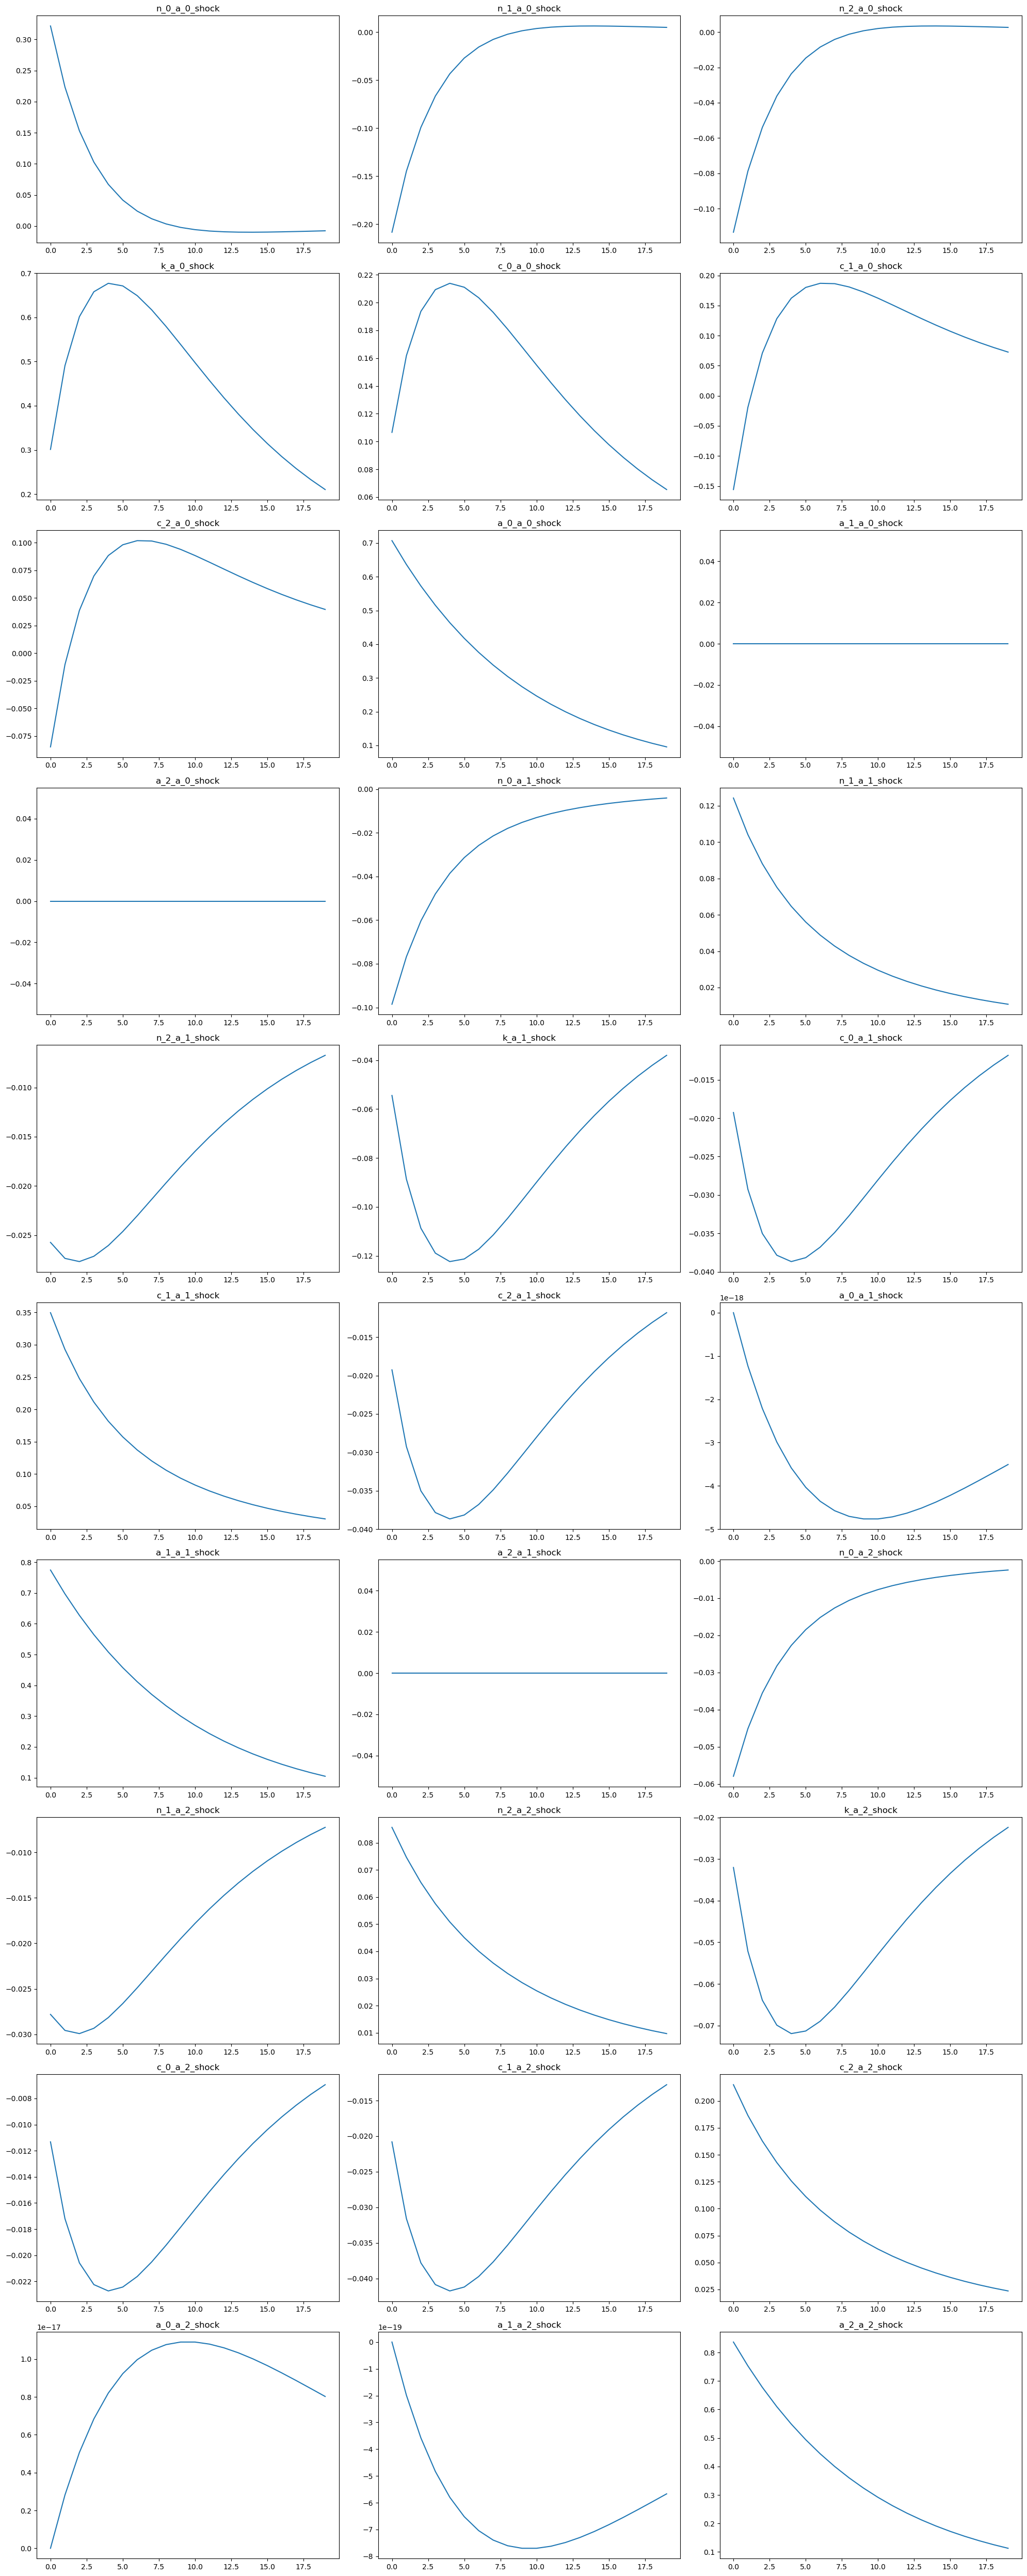

In [11]:
for shock in {key[-1] for key in t1.dict_irfs.keys()}:
    t1.plot_irfs(shock,cols=3)